In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from tqdm import tqdm

In [5]:
def f(current, E=-0.5):
    return -2*(1/current+E)

In [6]:
def w_aux(current, h, E=-0.5):
    return 1 - h**2*f(current+h, E)/12

In [7]:
def dx_aux(current, h, E=-0.5):
    return 1 - h**2*f(current+h, E)/6

In [8]:
def xh_aux(current, h, E=-0.5):
    return 2+5*h**2*f(current, E=-0.5)/6

In [9]:
def numerator(current, h, x_current, dx_current, E=-0.5):
    return xh_aux(current, h, E=-0.5) * w_aux(current, -h, E=-0.5) * x_current + 2*h*dx_current*dx_aux(current, -h, E=-0.5)

In [10]:
def denominator(current, h, x_current, dx_current, E=-0.5):
    return w_aux(current, h, E=-0.5) * dx_aux(current, -h, E=-0.5) + w_aux(current, -h, E=-0.5) * dx_aux(current, h, E=-0.5)

In [11]:
def xh(current, h, x_current, dx_current, E=-0.5):
    return numerator(current, h, x_current, dx_current, E=-0.5) / denominator(current, h, x_current, dx_current, E=-0.5)

In [12]:
xh(0.0002, 0.0001, 0, 0.001, E=-0.5)

1.0000000006481637e-07

# forward

In [13]:
E = -0.5

current = 0.00002
h = 0.00001
x_current = 0
dx_current = 0.001

# x_prev = xh(current, -h, x_current, dx_current)




r_values = []
xh_values = []

for i in tqdm(range(500000)):
    
    x_next = xh(current, h, x_current, dx_current, E=-0.5)
    
    x_next_leap_frog = xh(current, 0.75*h, x_current, dx_current, E=-0.5)
    
    dx_current = (x_next - x_next_leap_frog)/(0.25*h)
    
    x_current = x_next
    current = current + h
    
    r_values.append(current)
    xh_values.append(x_current)
    

100%|███████████████████████████████| 500000/500000 [00:02<00:00, 211509.20it/s]


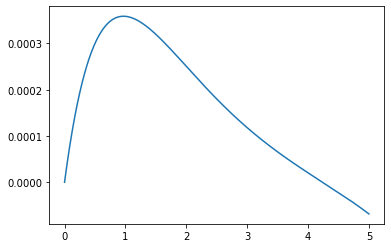

In [130]:
plt.plot(r_values, xh_values)

In [131]:
r_values = np.array(r_values)

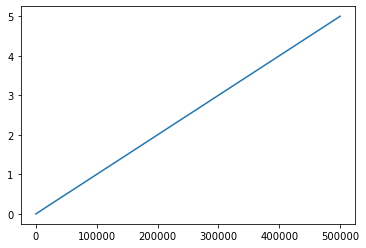

In [132]:
plt.plot(r_values)

In [133]:
exact = r_values * np.exp(-r_values)

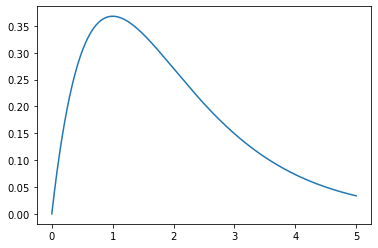

In [134]:
plt.plot(r_values, exact)

In [135]:
r_values

array([3.00000e-05, 4.00000e-05, 5.00000e-05, ..., 5.00000e+00,
       5.00001e+00, 5.00002e+00])

# backward

In [137]:
E = -0.1
current = 10
h = 0.00001
x_current = 0
dx_current = 0.0007

# x_prev = xh(current, -h, x_current, dx_current)




r_values = []
xh_values = []

for i in tqdm(range(int(current / h))):
    
    x_next = xh(current, -h, x_current, dx_current, E=-0.5)
    
    x_next_leap_frog = xh(current, -0.75*h, x_current, dx_current, E=-0.5)
    
    dx_current = (x_next - x_next_leap_frog)/(-0.25*h)
    
    x_current = x_next
    current = current - h
    
    r_values.append(current)
    xh_values.append(-x_current)
    

100%|███████████████████████████████| 999999/999999 [00:04<00:00, 211559.33it/s]


In [138]:
r_values[-1]

1.0000209408935746e-05

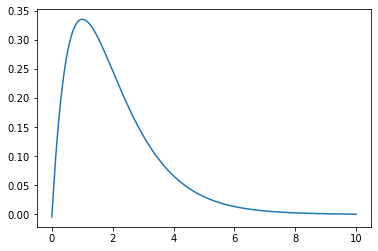

In [139]:
plt.plot(r_values[::-1], xh_values[::-1])

In [140]:
xh_values

[7.000000000046668e-09,
 1.400000000052792e-08,
 2.1000000002015425e-08,
 2.800000000508086e-08,
 3.500000001029589e-08,
 4.2000000018232204e-08,
 4.900000002946144e-08,
 5.60000000445553e-08,
 6.300000006408546e-08,
 7.000000008862355e-08,
 7.700000011874129e-08,
 8.400000015501031e-08,
 9.100000019800227e-08,
 9.800000024828883e-08,
 1.050000003064416e-07,
 1.1200000037303234e-07,
 1.1900000044863267e-07,
 1.2600000053381426e-07,
 1.330000006291488e-07,
 1.4000000073520785e-07,
 1.4700000085256307e-07,
 1.540000009817861e-07,
 1.6100000112344857e-07,
 1.6800000127812226e-07,
 1.750000014463789e-07,
 1.8200000162879e-07,
 1.8900000182592734e-07,
 1.9600000203836253e-07,
 2.0300000226666724e-07,
 2.100000025114132e-07,
 2.1700000277317216e-07,
 2.2400000305251576e-07,
 2.3100000335001561e-07,
 2.380000036662433e-07,
 2.450000040017704e-07,
 2.5200000435716843e-07,
 2.590000047330093e-07,
 2.6600000512986454e-07,
 2.730000055483061e-07,
 2.800000059889054e-07,
 2.870000064522342e-07,
 2

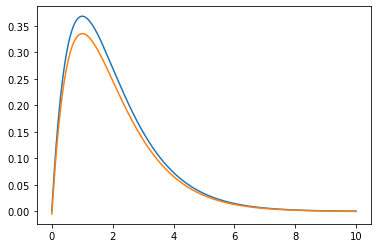

In [141]:
r_values = np.array(r_values)
exact = r_values * np.exp(-r_values)

plt.plot(r_values, exact)
plt.plot(r_values[::-1], xh_values[::-1])

# Shooting Method

In [150]:
def numerov(E, h, current, x_current=0, dx_current=0.007, direction=-1):
    # E = -0.1
    # current = 10
    # h = 0.00001
    # x_current = 0
    # dx_current = 0.0007

    # x_prev = xh(current, -h, x_current, dx_current)

    
    if direction not in [-1, 1]:
        raise Exception("Invalid direction")

    n_steps = int(current / h)

    r_values = np.zeros((n_steps, ), dtype=float)
    xh_values = np.zeros((n_steps, ), dtype=float)

    
    for i in tqdm(range(n_steps), position=0, leave=True):

        x_next = xh(current, h*direction, x_current, dx_current, E=E)

        x_next_leap_frog = xh(current, 0.75*h*direction, x_current, dx_current, E=E)

        dx_current = (x_next - x_next_leap_frog)/(0.25*h*direction)

        x_current = x_next
        current = current + h * direction

        r_values[::direction][i] = current
        xh_values[::direction][i] = x_current
        
    normalization_factor = np.sqrt((xh_values * xh_values).sum())
    
    xh_values /= normalization_factor
        
    return r_values, xh_values * direction, xh_values[0], xh_values[-1]

In [144]:
E = -0.5
current = 10
h = 0.00001
x_current = 0
dx_current = 0.0007

r_values, xh_values, u0, un = numerov(E, h, current, x_current=x_current, dx_current=dx_current, direction=-1)

100%|███████████████████████████████| 999999/999999 [00:04<00:00, 202329.64it/s]


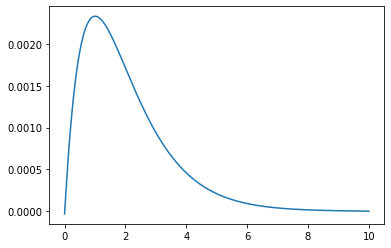

In [145]:
plt.plot(r_values, xh_values)

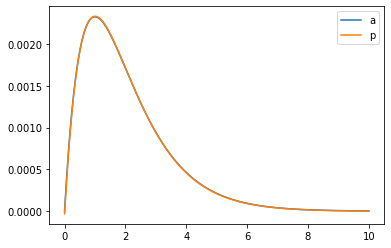

In [146]:
exact = r_values * np.exp(-r_values)
exact /= np.sqrt((exact*exact).sum())
plt.plot(r_values, exact)
plt.legend("exact")
plt.plot(r_values, xh_values)
plt.legend("approx")

In [147]:
E_guess = np.linspace(-0.7, 0.7, int(4/0.1))

In [148]:
E_guess

array([-0.7       , -0.66410256, -0.62820513, -0.59230769, -0.55641026,
       -0.52051282, -0.48461538, -0.44871795, -0.41282051, -0.37692308,
       -0.34102564, -0.30512821, -0.26923077, -0.23333333, -0.1974359 ,
       -0.16153846, -0.12564103, -0.08974359, -0.05384615, -0.01794872,
        0.01794872,  0.05384615,  0.08974359,  0.12564103,  0.16153846,
        0.1974359 ,  0.23333333,  0.26923077,  0.30512821,  0.34102564,
        0.37692308,  0.41282051,  0.44871795,  0.48461538,  0.52051282,
        0.55641026,  0.59230769,  0.62820513,  0.66410256,  0.7       ])

In [149]:
_, _, u0_last, _ = numerov(-4, h, current, x_current=x_current, dx_current=dx_current, direction=-1)
for egs in tqdm(E_guess, position=0, leave=True):
    _, _, u0_current, _ = numerov(egs, h, current, x_current=x_current, dx_current=dx_current, direction=-1)
    
    print("egs: ", egs, "u_0: ", u0_current)
    
    if u0_current * u0_last < 0:
        print("guess: ", egs)
        
    u0_last = u0_current

  2%|█                                           | 1/40 [00:04<03:12,  4.94s/it]

egs:  -0.7 u_0:  3.253170213235148e-05


  5%|██▏                                         | 2/40 [00:09<03:07,  4.92s/it]

egs:  -0.6641025641025641 u_0:  3.253170213235148e-05


  8%|███▎                                        | 3/40 [00:14<03:02,  4.92s/it]

egs:  -0.6282051282051282 u_0:  3.253170213235148e-05


 10%|████▍                                       | 4/40 [00:19<02:57,  4.92s/it]

egs:  -0.5923076923076923 u_0:  3.253170213235148e-05


 10%|████▍                                       | 4/40 [00:23<03:28,  5.80s/it]


KeyboardInterrupt: 